In [1501]:
from keras.datasets import cifar10

In [1502]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Softmax, Dropout
from keras.layers.normalization import BatchNormalization


In [1503]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [1504]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [1505]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Create Model

In [1506]:
cnn = tf.keras.models.Sequential()

In [1507]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding = 'same',
        activation='relu', input_shape=[32, 32, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.2))
#cnn.add(BatchNormalization())


In [1508]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding = 'same', 
        activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.3))
#cnn.add(BatchNormalization())


In [1509]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding = 'same',
        activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.4))
#cnn.add(BatchNormalization())



### Flattening

In [1510]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(Dropout(0.2))

In [1511]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu',
       kernel_initializer = 'normal'))
cnn.add(Dropout(0.2))

In [1512]:
cnn.add(tf.keras.layers.Dense(units=256, activation='tanh',
       kernel_initializer = 'normal'))
cnn.add(Dropout(0.3))

In [1513]:
cnn.add(tf.keras.layers.Dense(units=128, activation='tanh'))
#cnn.add(Dropout(0.3))

In [1514]:
# cnn.add(tf.keras.layers.Dense(units=32, activation='tanh'))
# #cnn.add(Dropout(0.3))

In [1515]:
cnn.add(tf.keras.layers.Dense(units=10, kernel_initializer = 'normal',
                              activation='softmax'))

In [1516]:
cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
                


In [1517]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [1518]:
# y_train = y_train.astype('float32')
# y_test = y_test.astype('float32')

In [1519]:

datagen = ImageDataGenerator(
#         featurewise_center=False,
#         samplewise_center=True,
#         featurewise_std_normalization=True,
#         samplewise_std_normalization=True,
#         zca_whitening=True,
        rotation_range = 20,  # randomly rotate images in the range (degrees, 0 to 180)
        horizontal_flip = True,  # randomly flip images
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range = 0.1,
        zoom_range = 0.1)
        #vertical_flip = False
    
    
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)
  

# fit the model on batches generated by datagen.flow()
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min',
                            verbose = 2, patience = 10)

history = cnn.fit_generator(datagen.flow(x_train, y_train,
                            batch_size=64),
                            epochs=50,
                            validation_data=(x_test, y_test),
                            callbacks=[early_stop])

# padding = same
#  kernel_initializer = 'normal',

Epoch 1/50
782/782 [==============================] - 81s 102ms/step - loss: 2.0058 - accuracy: 0.2405 - val_loss: 1.4689 - val_accuracy: 0.4558
Epoch 2/50
782/782 [==============================] - 70s 90ms/step - loss: 1.6644 - accuracy: 0.3845 - val_loss: 1.3725 - val_accuracy: 0.4956
Epoch 3/50
782/782 [==============================] - 77s 99ms/step - loss: 1.5705 - accuracy: 0.4197 - val_loss: 1.3594 - val_accuracy: 0.5019
Epoch 4/50
782/782 [==============================] - 79s 101ms/step - loss: 1.4874 - accuracy: 0.4562 - val_loss: 1.2406 - val_accuracy: 0.5526
Epoch 5/50
782/782 [==============================] - 85s 109ms/step - loss: 1.4490 - accuracy: 0.4755 - val_loss: 1.2867 - val_accuracy: 0.5311
Epoch 6/50
782/782 [==============================] - 82s 105ms/step - loss: 1.4187 - accuracy: 0.4842 - val_loss: 1.3476 - val_accuracy: 0.5072
Epoch 7/50
782/782 [==============================] - 74s 94ms/step - loss: 1.3867 - accuracy: 0.4978 - val_loss: 1.2225 - val_accur

313/313 - 3s - loss: 0.9766 - accuracy: 0.6568


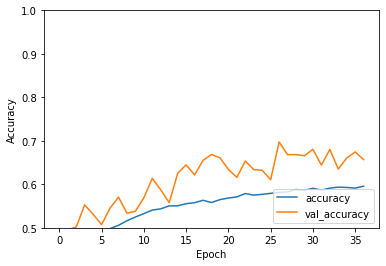

In [1520]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(x_test,  y_test, verbose=2)

In [1521]:
print(test_acc)

0.6567999720573425


In [1522]:
predictions = np.argmax(cnn.predict(x_test), axis=-1)
num = range(1,10001)

In [1523]:
submit = pd.DataFrame(num,columns=['id'])
submit['class'] = predictions

In [1524]:
submit.to_csv('submit.csv', index = False)